<a href="https://colab.research.google.com/github/TatsianaVladykina/TMS_final/blob/main/Diplom_Sentiment_Analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ настроений отзывов и определение эмоций в отзывах

Зачем  искать твиты с негативным сентиментом?

Компании тратят много денег на то, чтобы клиенты были довольны. Будь то товар или услуга, опыт клиентов, выливающийся в отзывы, влияют на восприятие того или иного товара или услуги, или всего бренда целиком.

Недовольные клиенты выражают свое недовольство различными способами. Пожалуй, самым распространенным каналом являются социальные сети. Плохие отзывы о продуктах компании в социальных сетях, как правило, являются подлинным отражением личного опыта клиентов и без своевременных принятий мер имеют свойство хоронить под собой положительные отзывы.

Следовательно, своевременное обнаружение постов с негативной оценкой товаров или услуг очень полезное для компании мероприятие. Это позволяет компании определить недовольных клиентов и предоставить им немедленную поддержку, либо корректировку самого товара или услуги, вплоть до их возврата.

Кроме того, отслеживание количества сообщений с положительной и негативной оценкой позволяет компаниям получать представление об отдаче своих вложений, будь то маркетинг или  производство.

В работе выолняются следующие исследования:

1. Прогнозное моделирование с помощью машинного обучения (логистическая регрессия, полиномиальный наивный байесовский метод, метод опорных векторов со стохастическим градиентным спуском, случайный лес) с применением двух способов векторизации: Bag of words и Term Frequency-Inverse Document Frequency (TFIDF).

2. Классификация настроений отзывов с использованием предварительно обученной модели HuggingFace.

3. Определение эмоций в отзывах с использованием модели HuggingFace.

План работы:

1. Импорт библиотек.

2. Импорт данных и предобработка (включая приведение к нижнему регистру, удаление пунктуации, удаление стоп-слов, лемматизацию. Изменение df, построение графиков).

3. Прогнозное моделирование с помощью машинного обучения (Разбиение на обучающую, валидационную и тестовую выборки. Векторизация: Bags of words model, TFIDF. Модели: логистическая регрессия, полиномиальный наивный байесовский метод, метод опорных векторов со стохастическим градиентным спуском, случайный лес. Результаты).

4. Классификация настроений отзывов с использованием предварительно обученной модели HuggingFace.

5. Определение эмоций в отзывах с использованием модели HuggingFace.

6. Выводы.

Набор данных:  https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022

Отзывы на музыкальное приложение Spotify.

Spotify — один из крупнейших поставщиков услуг потоковой передачи музыки: по состоянию на март 2022 года у него более 422 миллионов активных пользователей в месяц, включая 182 миллиона платных подписчиков.
Состоит из пяти столбцов:
1. Time_submitted - дата и время отправки отзыва.
2. Review - текст отзыва.
3. Rating - оценка по пятибальной шкале (количество звёзд от 1 до 5).
4. Total_thumbsup - количество человек, для которых отзыв оказался положительным.
5. Reply - ответ на отзыв.

Набор данных содержит отзывы с 01.01.2022 по 07.09.2022, собранные в Google Play Store.

Количество строк: 61594


Модель для п.4: Twitter-roBERTa-base for Sentiment Analysis - UPDATED (2022)

https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

Это базовая модель RoBERTa, обученная на примерно 124 миллионах твитов (из Twitter) с января 2018 года по декабрь 2021 года и настроенная для анализа настроений.

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Модель для п.5:  https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

Эта модель классифицирует эмоции в англиском тексте.

Модель предсказывает 6 базовых эмоций и нейтральный класс: anger, , disgust, fear, joy, neutral, sadness, surprise.

Модель является доработанной DistilRoBERTa-base моделью.

# 1.Импорт библиотек

In [1]:
!pip install scikit-learn

In [2]:
!pip install scikit-plot

In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 111.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scipy
import re
import string
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import pandas as pd
import numpy as np
import os
import random
from pathlib import Path
import json

import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

# 2.Импорт данных и предобработка

In [5]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/MyDrive/DS/reviews.csv')
print(data.shape)

Mounted at /content/drive
(61594, 5)


In [6]:
# вывод данных в формате таблицы
data.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
data.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [9]:
# Формирование нового датасета из столбцов Review и Rating
new_df = data[['Review', 'Rating']]

In [10]:
new_df.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


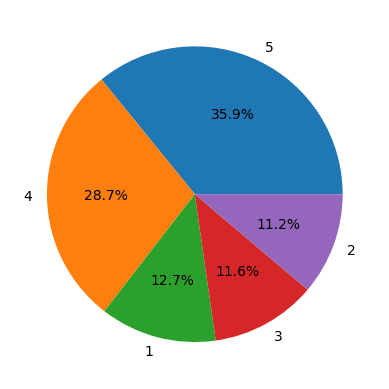

In [11]:
#Построение круговой диаграммы по рейтингу от одного до пяти
plt.pie(new_df['Rating'].value_counts(), labels=data['Rating'].unique(), autopct='%1.1f%%')
plt.show()

In [12]:
#Построение гистограмы по рейтингу
import plotly.express as px
# count of ratings
fig = px.histogram(new_df,
             x = 'Rating',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'Rating',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [13]:
#изменение значений в столбце Rating на негативное, нейтральное, позитивное
replace_dict = {'Rating': {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}}
new_df2 = new_df.replace(replace_dict)

In [14]:
new_df2.head()

,Review,Rating
0,"Great music service, the audio is high quality...",positive
1,Please ignore previous negative rating. This a...,positive
2,"This pop-up ""Get the best Spotify experience o...",positive
3,Really buggy and terrible to use as of recently,negative
4,Dear Spotify why do I get songs that I didn't ...,negative


In [15]:
new_df2['Rating'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

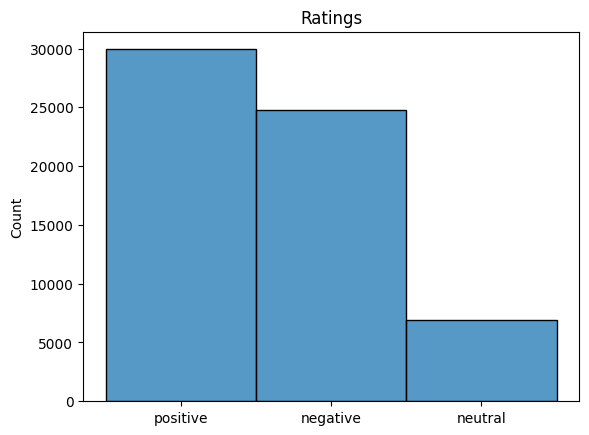

In [16]:
sns.histplot(new_df2['Rating'])
plt.title('Ratings')
plt.xlabel('')
plt.show()

In [17]:
#количество отзывов по категориям
new_df2['Rating'].value_counts()

positive    29937
negative    24771
neutral      6886
Name: Rating, dtype: int64

Предобработка текстовых данных:

1. Lowercase - приведение всех символов к нижнему регистру, чтобы уменьшить размер словаря и устранить различия между словами, которые отличаются только регистром (например, “Google” и “google”).

2. Remove punctuations - удаление знаков препинания, которые не несут смысловой нагрузки и могут мешать анализу текста (например, запятые, точки, скобки).

3. Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки и могут мешать анализу текста (например, артикли, союзы, предлоги).

4. Lemmatize - приведение слов к их нормальной форме (лемме), чтобы устранить различия между формами одного и того же слова (например, “бегут” и “бежал” к “бежать”).

5. *** Tokenize - разбиение текста на отдельные единицы (токены), которые могут быть словами, символами или фразами. Токенизация позволяет обрабатывать текст как последовательность токенов, а не как целый блок.

In [18]:
# Lowercase. Приведение всех символов к нижнему регистру
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
new_df2.head(10)

,Review,Rating
0,"great music service, the audio is high quality...",positive
1,please ignore previous negative rating. this a...,positive
2,"this pop-up ""get the best spotify experience o...",positive
3,really buggy and terrible to use as of recently,negative
4,dear spotify why do i get songs that i didn't ...,negative
5,the player controls sometimes disappear for no...,neutral
6,i love the selection and the lyrics are provid...,positive
7,still extremely slow when changing storage to ...,neutral
8,it's a great app and the best mp3 music app i ...,positive
9,"i'm deleting this app, for the following reaso...",negative


In [19]:
# Remove punctuations. удаление знаков препинания, которые не несут смысловой нагрузки
import re
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))
new_df2.head(10)

,Review,Rating
0,great music service the audio is high quality ...,positive
1,please ignore previous negative rating this ap...,positive
2,this pop-up get the best spotify experience on...,positive
3,really buggy and terrible to use as of recently,negative
4,dear spotify why do i get songs that i didnt p...,negative
5,the player controls sometimes disappear for no...,neutral
6,i love the selection and the lyrics are provid...,positive
7,still extremely slow when changing storage to ...,neutral
8,its a great app and the best mp3 music app i h...,positive
9,im deleting this app for the following reasons...,negative


In [20]:
# Stopword Removal. Удаление часто встречающихся слов, которые не несут смысловой нагрузки
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
stop_words = stopwords.words('english')
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
new_df2.head(10)

,Review,Rating
0,great music service audio high quality app eas...,positive
1,please ignore previous negative rating app sup...,positive
2,pop-up get best spotify experience android 12 ...,positive
3,really buggy terrible use recently,negative
4,dear spotify get songs didnt put playlist shuf...,negative
5,player controls sometimes disappear reason app...,neutral
6,love selection lyrics provided song youre list...,positive
7,still extremely slow changing storage external...,neutral
8,great app best mp3 music app ever used one pro...,positive
9,im deleting app following reasons app failing ...,negative


In [23]:
# Lemmatize. Приведение слов к их нормальной форме (лемме)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
from nltk.stem import WordNetLemmatizer
lemmat = WordNetLemmatizer()
new_df2.loc[:,'Review'] = new_df2.loc[:,'Review'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))
new_df2.head(10)

,Review,Rating
0,great music service audio high quality app eas...,positive
1,please ignore previous negative rating app sup...,positive
2,pop-up get best spotify experience android 12 ...,positive
3,really buggy terrible use recently,negative
4,dear spotify get song didnt put playlist shuff...,negative
5,player control sometimes disappear reason app ...,neutral
6,love selection lyric provided song youre liste...,positive
7,still extremely slow changing storage external...,neutral
8,great app best mp3 music app ever used one pro...,positive
9,im deleting app following reason app failing b...,negative


In [25]:
# создание df_for_sensitive для использования в ML и моделях HuggingFace

df_for_sensitive = new_df2

# 3.Прогнозное моделирование с помощью машинного обучения

Разделение набора данных на три части: обучающая (60%), проверочная (20%) и тестовая (20%)

In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_for_sensitive['Review'], df_for_sensitive['Rating'], test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (36956,)
Validation set shape: (12319,)
Test set shape: (12319,)


Bag of Words и TF-IDF - это два распространенных метода предварительной обработки текстовых данных, которые позволяют преобразовать текст в числовую форму.

Bag of words преобразует текст в векторы фиксированной длины, подсчитывая, сколько раз каждое слово встречается в тексте.

TFIDF работает путем пропорционального увеличения количества раз, когда слово появляется в документе, но это компенсируется количеством документов, в которых оно присутствует.

Bags of words model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object
cv = CountVectorizer()

# Transform the train set into a bag-of-words representation
cv_train_review = cv.fit_transform(X_train)

# Transform the validation set into a bag-of-words representation
cv_val_review = cv.transform(X_val)

# Transform the test set into a bag-of-words representation
cv_test_review = cv.transform(X_test)

print('BOW_cv_train:', cv_train_review.shape)
print('BOW_cv_val:', cv_val_review.shape)
print('BOW_cv_test:', cv_test_review.shape)

BOW_cv_train: (36956, 20110)
BOW_cv_val: (12319, 20110)
BOW_cv_test: (12319, 20110)


Term Frequency-Inverse Document Frequency model (TFIDF)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tv = TfidfVectorizer()

# Transform the train set into a TF-IDF representation
tv_train_review = tv.fit_transform(X_train)

# Transform the validation set into a TF-IDF representation
tv_val_review = tv.transform(X_val)

# Transform the test set into a TF-IDF representation
tv_test_review = tv.transform(X_test)

print('Tfidf_train:', tv_train_review.shape)
print('Tfidf_val:', tv_val_review.shape)
print('Tfidf_test:', tv_test_review.shape)

Tfidf_train: (36956, 20110)
Tfidf_val: (12319, 20110)
Tfidf_test: (12319, 20110)


# Logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression
# Создание объекта LogisticRegression
lr = LogisticRegression(C = 1.0)
# Обучение модели на тренировочных данных

# Обучение модели для Bag of words
lr_bow=lr.fit(cv_train_review,y_train)
print(lr_bow)
# Получение оценки точности на валидационных данных
accuracy = lr.score(cv_val_review, y_val)
print('Accuracy:', accuracy)

# Обучение модели для tfidf-функций
lr_tfidf=lr.fit(tv_train_review,y_train)
print(lr_tfidf)
# Получение оценки точности на валидационных данных
accuracy = lr.score(tv_val_review, y_val)
print('Accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()
Accuracy: 0.7654030359607111
LogisticRegression()
Accuracy: 0.7842357334199205


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [31]:
# Предсказание модели для Bag of words
lr_bow_predict=lr.predict(cv_test_review)
print(lr_bow_predict)

#Предсказание модели для tfidf-функций
lr_tfidf_predict=lr.predict(tv_test_review)
print(lr_tfidf_predict)

['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']
['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']


In [32]:
#Оценка точности для Bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Оценка точности для tfidf-функций
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7338257975485023
lr_tfidf_score : 0.7822063479178505


“Accuracy” - это показатель точности модели, который определяется как доля правильных ответов, полученных моделью на тестовых данных. Чем выше значение Accuracy, тем лучше модель справляется с задачей.

In [33]:
#Classification report for bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['positive','neutral','negative'])
print(lr_bow_report)

#Classification report for tfidf featuren
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['positive','neutral','negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    positive       0.75      0.80      0.78      4909
     neutral       0.26      0.38      0.30      1412
    negative       0.92      0.76      0.83      5998

    accuracy                           0.73     12319
   macro avg       0.64      0.65      0.64     12319
weighted avg       0.77      0.73      0.75     12319

              precision    recall  f1-score   support

    positive       0.73      0.89      0.80      4909
     neutral       0.31      0.04      0.07      1412
    negative       0.85      0.87      0.86      5998

    accuracy                           0.78     12319
   macro avg       0.63      0.60      0.58     12319
weighted avg       0.74      0.78      0.75     12319



В отчете о классификации (classification report) показатели precision, recall и f1-score являются метриками качества классификации. Precision - это доля правильных положительных ответов относительно общего количества положительных ответов. Recall - это доля правильных положительных ответов относительно общего количества реальных положительных ответов. F1-score - это взвешенное гармоническое среднее между precision и recall. Чем ближе значение F1-score к 1, тем лучше модель.

Матрица ошибок (confusion matrix) - это таблица, которая показывает, сколько объектов было классифицировано правильно и сколько неправильно

In [34]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,lr_bow_predict)
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,lr_tfidf_predict)
print(cm_tfidf)

[[3942  766  201]
 [ 661  532  219]
 [ 645  787 4566]]
[[4362   69  478]
 [ 876   59  477]
 [ 719   64 5215]]


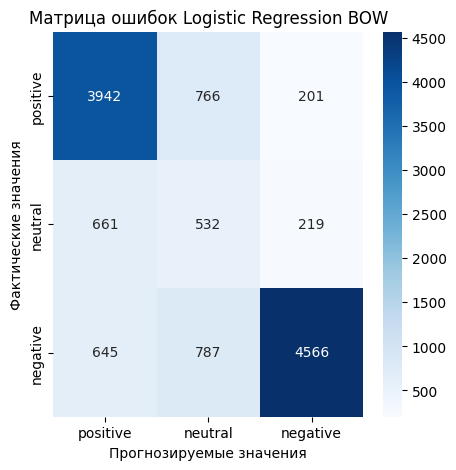

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,lr_bow_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок Logistic Regression BOW')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

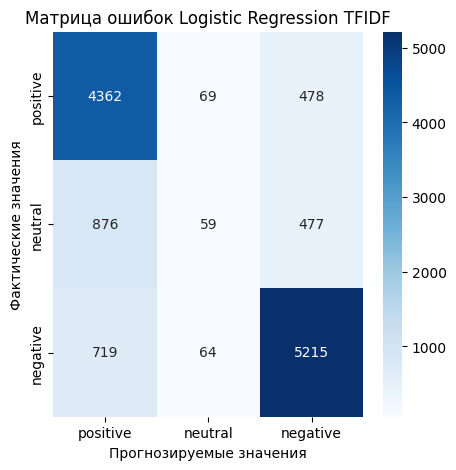

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,lr_tfidf_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок Logistic Regression TFIDF')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

In [90]:
# Прогнозирование настроения отзыва с использованием логистической регрессии
phrase = "good music"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для Bag of words
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

#Предсказание модели для tfidf-функций
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
lr_tfidf_predict = lr.predict(tv_test_text_transformed)
print(lr_tfidf_predict)

['positive']
['positive']


# Multinomial Naive Bayes

In [38]:
#Multinomial Naive Bayes for bag of words and tfidf features
#training the model
mnb=MultinomialNB()

#fitting the mnb for bag of words
mnb_bow=mnb.fit(cv_train_review,y_train)
print(mnb_bow)
#вывод атрибутов объекта
print('MultinomialNB(alpha=%s, class_prior=%s, fit_prior=%s)' % (mnb.alpha, mnb.class_prior, mnb.fit_prior))

#fitting the mnb for tfidf features
mnb_tfidf=mnb.fit(tv_train_review,y_train)
print(mnb_tfidf)
#вывод атрибутов объекта
print('MultinomialNB(alpha=%s, class_prior=%s, fit_prior=%s)' % (mnb.alpha, mnb.class_prior, mnb.fit_prior))

MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [39]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_review)
print(mnb_bow_predict)

#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_review)
print(mnb_tfidf_predict)

['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']
['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']


In [40]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7731958762886598
mnb_tfidf_score : 0.7701112103255134


In [41]:
#Classification report for bag of words
mnb_bow_report=classification_report(y_test,mnb_bow_predict,labels=['positive','neutral','negative'])
print(mnb_bow_report)

#Classification report for tfidf features
mnb_tfidf_report=classification_report(y_test,mnb_tfidf_predict,labels=['positive','neutral','negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    positive       0.84      0.86      0.85      5998
     neutral       0.00      0.00      0.00      1412
    negative       0.70      0.89      0.79      4909

    accuracy                           0.77     12319
   macro avg       0.52      0.58      0.55     12319
weighted avg       0.69      0.77      0.73     12319

              precision    recall  f1-score   support

    positive       0.84      0.85      0.85      5998
     neutral       0.00      0.00      0.00      1412
    negative       0.70      0.89      0.78      4909

    accuracy                           0.77     12319
   macro avg       0.51      0.58      0.54     12319
weighted avg       0.69      0.77      0.72     12319



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [42]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,mnb_bow_predict)
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,mnb_tfidf_predict)
print(cm_tfidf)

[[4388    0  521]
 [ 987    0  425]
 [ 859    2 5137]]
[[4375    0  534]
 [ 983    0  429]
 [ 886    0 5112]]


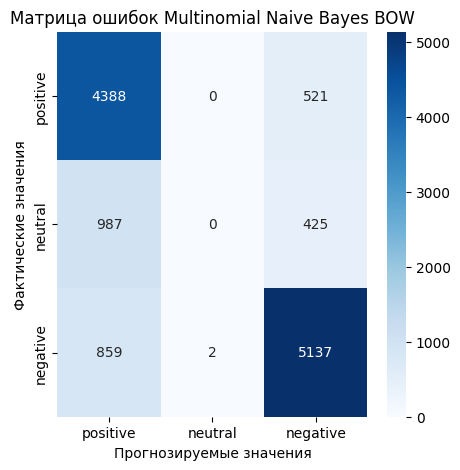

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,mnb_bow_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок Multinomial Naive Bayes BOW')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

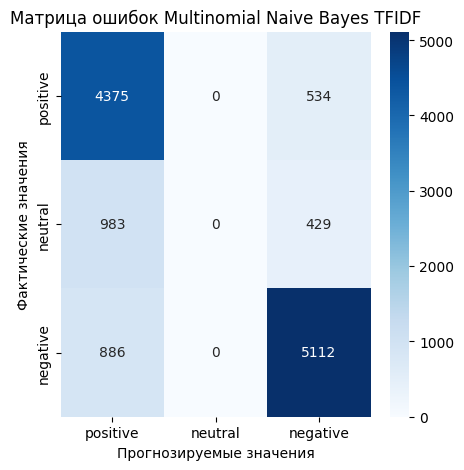

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,mnb_tfidf_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок Multinomial Naive Bayes TFIDF')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

In [45]:
phrase = "good music"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для Bag of words
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
mnb_bow_predict = mnb.predict(cv_test_text_transformed)
print(mnb_bow_predict)

#Предсказание модели для tfidf-функций
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
mnb_tfidf_predict = mnb.predict(tv_test_text_transformed)
print(mnb_tfidf_predict)

['positive']
['positive']


# SVM using Stochastic Gradient Descent

In [46]:
# Model SVM
from sklearn.svm import SVC
from sklearn import linear_model
svc = linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

# Обучение модели на тренировочных данных

# Обучение модели для Bag of words
svc_bow = svc.fit(cv_train_review,y_train)
print(svc_bow)
# Получение оценки точности на валидационных данных
accuracy = svc.score(cv_val_review, y_val)
print('Accuracy:', accuracy)

#Fitting the model for tfidf features
svc_tfidf=svc.fit(tv_train_review,y_train)
print(svc_tfidf)
# Get the accuracy score on the validation data
accuracy = svc.score(tv_val_review, y_val)
print('Accuracy:', accuracy)

SGDClassifier()
Accuracy: 0.7805828395161944
SGDClassifier()
Accuracy: 0.7843169088400033


In [47]:
#Predicting the model for bag of words
svc_bow_predict=svc.predict(cv_test_review)
print(svc_bow_predict)

#Predicting the model for tfidf features
svc_tfidf_predict=svc.predict(tv_test_review)
print(svc_tfidf_predict)

['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']
['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']


In [48]:
#Accuracy score for bag of words
svc_bow_score=accuracy_score(y_test,svc_bow_predict)
print("svc_bow_score :",svc_bow_score)

#Accuracy score for tfidf features
svc_tfidf_score=accuracy_score(y_test,svc_tfidf_predict)
print("svc_tfidf_score :",svc_tfidf_score)

svc_bow_score : 0.773114700868577
svc_tfidf_score : 0.7862651189219905


In [49]:
#Classification report for bag of words
svc_bow_report=classification_report(y_test,svc_bow_predict)
print(svc_bow_report)

#Classification report for tfidf features
svc_tfidf_report=classification_report(y_test,svc_tfidf_predict)
print(svc_tfidf_report)

              precision    recall  f1-score   support

    negative       0.70      0.92      0.79      4909
     neutral       0.29      0.06      0.09      1412
    positive       0.88      0.82      0.85      5998

    accuracy                           0.77     12319
   macro avg       0.62      0.60      0.58     12319
weighted avg       0.74      0.77      0.74     12319

              precision    recall  f1-score   support

    negative       0.72      0.91      0.81      4909
     neutral       0.00      0.00      0.00      1412
    positive       0.85      0.87      0.86      5998

    accuracy                           0.79     12319
   macro avg       0.52      0.59      0.56     12319
weighted avg       0.70      0.79      0.74     12319



In [50]:
#confusion matrix for bag of words
svc_bow=confusion_matrix(y_test,svc_bow_predict)
print(cm_bow)

#confusion matrix for tfidf features
svc_tfidf=confusion_matrix(y_test,svc_tfidf_predict)
print(cm_tfidf)

[[4388    0  521]
 [ 987    0  425]
 [ 859    2 5137]]
[[4375    0  534]
 [ 983    0  429]
 [ 886    0 5112]]


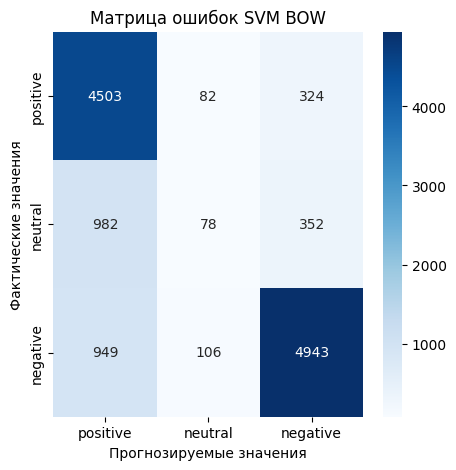

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,svc_bow_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок SVM BOW')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

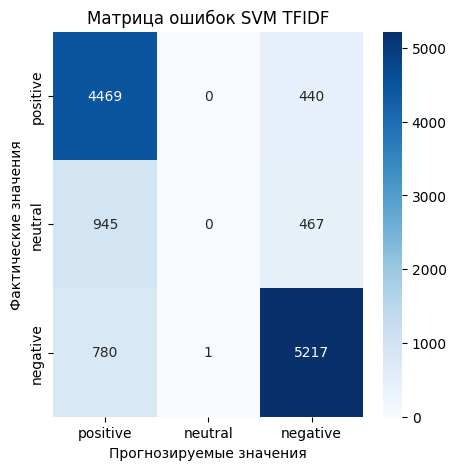

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,svc_tfidf_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок SVM TFIDF')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

In [53]:
phrase = "good music"

stop_words = set(stopwords.words('russian'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для Bag of words
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
svc_bow_predict=svc.predict(cv_test_text_transformed)
print(svc_bow_predict)

#Предсказание модели для tfidf-функций
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
svc_tfidf_predict=svc.predict(tv_test_text_transformed)
print(svc_tfidf_predict)

['positive']
['positive']


# Random Forest

Параметр n_estimators указывает количество деревьев, которые будут использоваться в модели

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50)

# Обучение модели для Bag of words
rf_bow = rf_model.fit(cv_train_review,y_train)
print(rf_bow)
# Получение оценки точности на валидационных данных
accuracy = rf_model.score(cv_val_review, y_val)
print('Accuracy:', accuracy)

# Обучение модели для tfidf-функций
rf_tfidf=rf_model.fit(tv_train_review,y_train)
print(rf_tfidf)
# Получение оценки точности на валидационных данных
accuracy = rf_model.score(tv_val_review, y_val)
print('Accuracy:', accuracy)

RandomForestClassifier(n_estimators=50)
Accuracy: 0.770273561165679
RandomForestClassifier(n_estimators=50)
Accuracy: 0.7667830181021187


In [55]:
#Predicting the model for bag of words
rf_bow_predict=rf_bow.predict(cv_test_review)
print(rf_bow_predict)

#Predicting the model for tfidf features
rf_tfidf_predict=rf_tfidf.predict(tv_test_review)
print(rf_tfidf_predict)

['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']
['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']


In [56]:
#Accuracy score for bag of words
rf_bow_score=accuracy_score(y_test,rf_bow_predict)
print("rf_bow_score :", rf_bow_score)

#Accuracy score for tfidf features
rf_tfidf_score=accuracy_score(y_test,rf_tfidf_predict)
print("rf_tfidf_score :", rf_tfidf_score)

rf_bow_score : 0.7317964120464323
rf_tfidf_score : 0.7654842113807939


In [57]:
#Classification report for bag of words
rf_bow_report=classification_report(y_test,rf_bow_predict)
print(rf_bow_report)

#Classification report for tfidf features
rf_tfidf_report=classification_report(y_test,rf_tfidf_predict)
print(rf_tfidf_report)

              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      4909
     neutral       0.31      0.02      0.03      1412
    positive       0.74      0.90      0.81      5998

    accuracy                           0.73     12319
   macro avg       0.59      0.55      0.53     12319
weighted avg       0.69      0.73      0.69     12319

              precision    recall  f1-score   support

    negative       0.69      0.89      0.78      4909
     neutral       0.23      0.00      0.01      1412
    positive       0.85      0.84      0.84      5998

    accuracy                           0.77     12319
   macro avg       0.59      0.58      0.54     12319
weighted avg       0.71      0.77      0.72     12319



In [58]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,rf_bow_predict)
print(cm_bow)

#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,rf_tfidf_predict)
print(cm_tfidf)

[[3587   36 1286]
 [ 725   26  661]
 [ 574   22 5402]]
[[4367   11  531]
 [1022    6  384]
 [ 932    9 5057]]


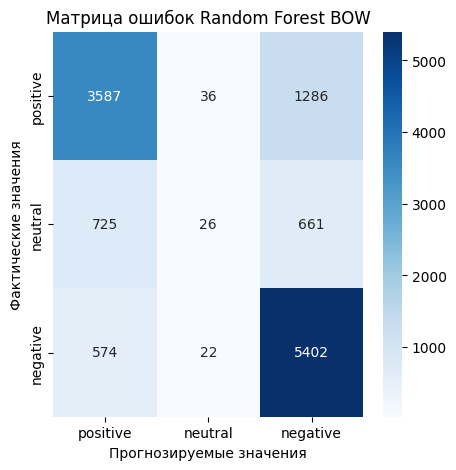

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,rf_bow_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок Random Forest BOW')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

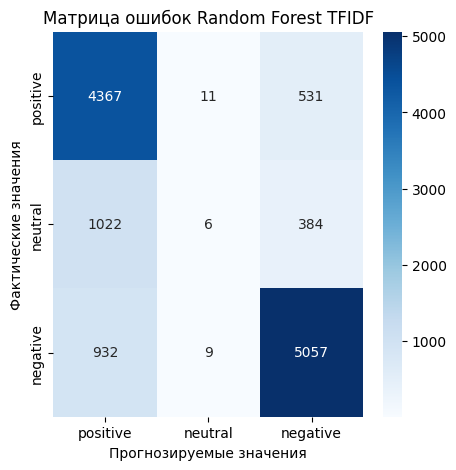

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['positive','neutral','negative']
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,rf_tfidf_predict), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
ax.set_title('Матрица ошибок Random Forest TFIDF')
ax.set_xlabel('Прогнозируемые значения')
ax.set_ylabel('Фактические значения')
plt.show()

In [61]:
phrase = "good music"

stop_words = set(stopwords.words('russian'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для Bag of words
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
rf_bow_predict=rf_bow.predict(cv_test_text_transformed)
print(rf_bow_predict)

#Предсказание модели для tfidf-функций
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
rf_tfidf_predict=rf_tfidf.predict(tv_test_text_transformed)
print(rf_tfidf_predict)

['positive']
['positive']


# Результаты

In [62]:
#Model Results
model = {'Model':['Logistic Regression','Multinomial Naive Bayes', 'SVM', 'Random Forest'],
         'Score BOW':[lr_bow_score, mnb_bow_score, svc_bow_score, rf_bow_score],
         'Score TFIDF':[lr_tfidf_score, mnb_tfidf_score, svc_tfidf_score, rf_tfidf_score]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score BOW,Score TFIDF
0,Logistic Regression,0.733826,0.782206
1,Multinomial Naive Bayes,0.773196,0.770111
2,SVM,0.773115,0.786265
3,Random Forest,0.731796,0.765484


Таким образом, наилучшие коэффициенты у Logistic Regression TFIDF и SVM TFIDF

In [63]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# create a sample dictionary
accuracy_container = {'Logistic Regression BOW': lr_bow_score,
                      'Logistic Regression TFIDF': lr_tfidf_score,
                      'Multinomial Naive Bayes BOW': mnb_bow_score,
                      'Multinomial Naive Bayes TFIDF': mnb_tfidf_score,
                      'SVM BOW': svc_bow_score,
                      'SVM TFIDF': svc_tfidf_score,
                      'Random Forest BOW': rf_bow_score,
                      'Random Forest TFIDF': rf_tfidf_score}

# create a pandas DataFrame from the dictionary
df = pd.DataFrame(list(accuracy_container.items()), columns=['Model', 'Accuracy Score'])

# create a bar chart with values on the same field
fig = go.Figure(data=[go.Bar(y=df['Accuracy Score'], x=df['Model'],
                             marker={'color': ['#2e83bf','#1e81c7','#2e83bf','#1e81c7','#2e83bf','#1e81c7','#2e83bf','#1e81c7']},
                             text=df['Accuracy Score'], textposition='auto')])

fig.update_layout(autosize=True, plot_bgcolor='rgb(275, 275, 275)',
                  #title="Comparison of Accuracy Scores of different classifiers",
                  title="Сравнение точности оценок моделей машинного обучения (на тестовых данных)",
                  xaxis_title="Модели машинного обучения",
                  yaxis_title="Точность оценок")

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.show()

Далее буде рассмотрен прогноз (и сравнение с данными первоначального датасета) отзывов

Прогноз для отзывов, которые в первоначальном датасете являются положительными

In [64]:
print(data.loc[137])

Time_submitted                                  2022-07-09 06:03:53
Review            It's a amazing app but if it has been an optio...
Rating                                                            4
Total_thumbsup                                                    0
Reply                                                           NaN
Name: 137, dtype: object


In [65]:
print(data.loc[137]['Review'])

It's a amazing app but if it has been an option to download songs it's completely fantasy


In [66]:
# Logistic Regression

phrase = "It's a amazing app but if it has been an option to download songs it's completely fantasy"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
lr_tfidf_predict = lr.predict(tv_test_text_transformed)
print(lr_tfidf_predict)

['positive']
['positive']


In [67]:
# Multinomial Naive Bayes
phrase = "It's a amazing app but if it has been an option to download songs it's completely fantasy"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
mnb_bow_predict = mnb.predict(cv_test_text_transformed)
print(mnb_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
mnb_tfidf_predict = mnb.predict(tv_test_text_transformed)
print(mnb_tfidf_predict)

['positive']
['positive']


In [68]:
# SVM

phrase = "It's a amazing app but if it has been an option to download songs it's completely fantasy"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
svc_bow_predict=svc.predict(cv_test_text_transformed)
print(svc_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
svc_tfidf_predict=svc.predict(tv_test_text_transformed)
print(svc_tfidf_predict)

['positive']
['positive']


In [69]:
# Random Forest
phrase = "It's a amazing app but if it has been an option to download songs it's completely fantasy"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
rf_bow_predict=rf_bow.predict(cv_test_text_transformed)
print(rf_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
rf_tfidf_predict=rf_tfidf.predict(tv_test_text_transformed)
print(rf_tfidf_predict)

['positive']
['positive']


Прогноз для отзывов, которые в первоначальном датасете являются отрицательными

In [70]:
data[data['Review'] == "You have to buy there stupid premium just to play a single song I literally have to go through 20 songs just to get to the one I want"].index.tolist()

[2903]

In [71]:
data[data['Review'] == "Would be great if it actually worked. I'm having issues with this app at least 50% of the time."].index.tolist()

[334]

In [72]:
print(data.loc[334])

Time_submitted                                  2022-07-08 19:26:52
Review            Would be great if it actually worked. I'm havi...
Rating                                                            2
Total_thumbsup                                                    0
Reply                                                           NaN
Name: 334, dtype: object


In [73]:
print(data.loc[334]['Review'])

Would be great if it actually worked. I'm having issues with this app at least 50% of the time.


In [74]:
# Logistic Regression

phrase = "Would be great if it actually worked. I'm having issues with this app at least 50% of the time."

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
lr_tfidf_predict = lr.predict(tv_test_text_transformed)
print(lr_tfidf_predict)

['negative']
['negative']


In [75]:
# SVM

phrase = "Would be great if it actually worked. I'm having issues with this app at least 50% of the time."

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
svc_bow_predict=svc.predict(cv_test_text_transformed)
print(svc_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
svc_tfidf_predict=svc.predict(tv_test_text_transformed)
print(svc_tfidf_predict)

['negative']
['negative']


Прогноз для отзывов, которые в первоначальном датасете являются нейтральными

In [76]:
data[data['Review'] == "One of my biggest critiques would be the song shuffling. I have over 1000+ songs why would you keep playing the 10-15 consistently 🙄"].index.tolist()

[16355]

In [77]:
print(data.loc[16355])

Time_submitted                                  2022-05-31 10:25:38
Review            One of my biggest critiques would be the song ...
Rating                                                            3
Total_thumbsup                                                    0
Reply                                                           NaN
Name: 16355, dtype: object


In [78]:
# Logistic Regression

phrase = "One of my biggest critiques would be the song shuffling. I have over 1000+ songs why would you keep playing the 10-15 consistently 🙄"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
lr_bow_predict = lr.predict(cv_test_text_transformed)
print(lr_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
lr_tfidf_predict = lr.predict(tv_test_text_transformed)
print(lr_tfidf_predict)

['neutral']
['positive']


In [79]:
# Multinomial Naive Bayes
phrase = "One of my biggest critiques would be the song shuffling. I have over 1000+ songs why would you keep playing the 10-15 consistently 🙄"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
mnb_bow_predict = mnb.predict(cv_test_text_transformed)
print(mnb_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
mnb_tfidf_predict = mnb.predict(tv_test_text_transformed)
print(mnb_tfidf_predict)

['negative']
['negative']


In [80]:
# SVM

phrase = "One of my biggest critiques would be the song shuffling. I have over 1000+ songs why would you keep playing the 10-15 consistently 🙄"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
svc_bow_predict=svc.predict(cv_test_text_transformed)
print(svc_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
svc_tfidf_predict=svc.predict(tv_test_text_transformed)
print(svc_tfidf_predict)

['negative']
['positive']


In [81]:
# Random Forest
phrase = "One of my biggest critiques would be the song shuffling. I have over 1000+ songs why would you keep playing the 10-15 consistently 🙄"

stop_words = set(stopwords.words('english'))
lemmat = WordNetLemmatizer()
phrase = " ".join(x.lower() for x in phrase.split())
phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
phrase = " ".join(word for word in phrase.split() if word not in stop_words)
phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

# Предсказание модели для BOW
cv_test_text = [phrase]
cv_test_text_transformed = cv.transform(cv_test_text)
rf_bow_predict=rf_bow.predict(cv_test_text_transformed)
print(rf_bow_predict)

#Предсказание модели для TFIDF
tv_test_text = [phrase]
tv_test_text_transformed = tv.transform(tv_test_text)
rf_tfidf_predict=rf_tfidf.predict(tv_test_text_transformed)
print(rf_tfidf_predict)

['positive']
['positive']


Вывод всех отзывов, у которых прогноз lr_bow_predict отрицательный

In [85]:
for i in df_for_sensitive['Review']:
  phrase = i
  stop_words = set(stopwords.words('english'))
  lemmat = WordNetLemmatizer()
  phrase = phrase.lower()
  phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
  phrase = " ".join(word for word in phrase.split() if word not in stop_words)
  phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

  # Prediction for BOW model
  cv_test_text = [phrase]
  cv_test_text_transformed = cv.transform(cv_test_text)
  lr_bow_predict = lr.predict(cv_test_text_transformed)
  if lr_bow_predict == 'negative':
    print(i)

app stuck loading black screen spotify logo restarted reinstalled luck using note 20 ultra
recommendation always popular stuff matter listen worst recommendation time little effort put made playlist exclusively 90 norwegian death metal dumb app would trip dick racing suggest island sun weezer playing bar exists time making almost impossible use without restarting phone
great music app favorite know like one thing dont like limited amount skip eatch hour recommend getting app great listening song friend love make playlist one 50 song
like still use ad bro many ad like pick play list literally 6 ad go say enjoy next 30 minute without ad liying cuz ad pop hasnt even 30 minute like set ima still use bro ad board
decent service except free version getting point least much time listening music spent listening ad get want people pay premium truly ridiculous used really like spotify turned played one song literally least 8 lost count ad ranging 15-45 second even enjoy next 30 min ad free liste

Вывод всех отзывов, у которых прогноз lr_bow_predict нейтральный

In [86]:
for i in df_for_sensitive['Review']:
  phrase = i
  stop_words = set(stopwords.words('english'))
  lemmat = WordNetLemmatizer()
  phrase = phrase.lower()
  phrase = re.sub('[^а-я А-Я 0-9-]+', '', phrase)
  phrase = " ".join(word for word in phrase.split() if word not in stop_words)
  phrase = " ".join(lemmat.lemmatize(word) for word in phrase.split())

  # Prediction for BOW model
  cv_test_text = [phrase]
  cv_test_text_transformed = cv.transform(cv_test_text)
  lr_bow_predict = lr.predict(cv_test_text_transformed)
  if lr_bow_predict == 'neutral':
    print(i)

one biggest critique would song shuffling 1000 song would keep playing 10-15 consistently
30 minute uninterrupted music 30 minute uninterrupted ad student atleast need 20 min music go 10 minute ad btw awesome beginning feel like amazon bttr
work great lie 30 minute ad free music watching ad watched 4 ad got 10 minute 3 ad good edit 10 minute music per hour rest annoying ad one ad even call stupid lol havent heard 30 minute ad 3 week
great app cant believe 10 buck listen music life let say life expectancy 75 year 75 12 month 10 monthly fee come 9000 mp3 cost buck dont know make cd anymore ill get cd downside 15 something higher might like song mp3s could buy song like album 10 buck worth seriousness aside wonder dj used spotify entire session
worst liar commercial almost every 10 min supposed 30 min ad free window im world 30 turn 10 15 mine im paying money
suck playlist playlist 20 hour long play freaking song playlist done 20 hour music get every damn song hear one repeat pick 20 song

# 4. Классификация настроений отзывов с использованием предварительно обученной модели HuggingFace

In [87]:
!pip install transformers

In [88]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00


In [89]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

In [ ]:
# Загрузка предварительно обученной модели для анализа отзывов
# В модели используются: Labels: 0 -> Negative;   1 -> Neutral;     2 -> Positive
model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Отбор строк каждого класса и объединение в result_df  (!!!С полным количеством строк грузится очень-очень-очень долго =(
neg_df = df_for_sensitive[df_for_sensitive['Rating']=='negative']
neu_df = df_for_sensitive[df_for_sensitive['Rating']=='neutral']
pos_df = df_for_sensitive[df_for_sensitive['Rating']=='positive']
# Объединение первых строк из каждого класса
result_df = pd.concat([neg_df.head(100), neu_df.head(100), pos_df.head(100)])

In [ ]:
#result_df.head()

In [ ]:
# вычисление "настроения" каждого отзыва с помощью подгруженной модели:
all_texts = result_df['Review'].values.tolist()
all_sentiments = model(all_texts)
result_df["Rating"] = [d["label"] for d in all_sentiments]

In [ ]:
result_df.head(15)

,Review,Rating
3,really buggy terrible use recently,negative
4,dear spotify get song didnt put playlist shuff...,negative
9,im deleting app following reason app failing b...,negative
10,love spotify usually app best others stated co...,negative
11,cant play spotify wifi,negative
12,amazon premium music family package good every...,negative
13,worst app always say im offline never showed s...,negative
16,android user - load glitch app player bar disa...,negative
18,always crashing unable play stop working every...,negative
19,know ad cost free use yes thats right 3 ad str...,neutral


Проверка результатов работы модели

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Вводимый текст (отзыв)
text = "Good app"
# Lowercase - приведение всех символов к нижнему регистру
text1 = " ".join(text.lower() for x in text.split())
# Remove punctuations - удаление знаков препинания
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
# Stopword Removal - удаление часто встречающихся слов, которые не несут смысловой нагрузки
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
# Lemmatize - приведение слов к их нормальной форме
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

result = model(text4)
print(result)

[{'label': 'positive', 'score': 0.9373641610145569}]


In [ ]:
# выбор отзыва из первоначального датасета для проверки работы модели
print(data.loc[137])

Time_submitted                                                                          2022-07-09 06:03:53
Review            It's a amazing app but if it has been an option to download songs it's completely fantasy
Rating                                                                                                    4
Total_thumbsup                                                                                            0
Reply                                                                                                   NaN
Name: 137, dtype: object


In [ ]:
pd.set_option('display.max_colwidth', None)
print(data.loc[137]['Review'])

It's a amazing app but if it has been an option to download songs it's completely fantasy


In [ ]:
text = "It's a amazing app but if it has been an option to download songs it's completely fantasy"
text1 = " ".join(text.lower() for x in text.split())
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

result = model(text4)
print(result)

[{'label': 'positive', 'score': 0.898709237575531}]


In [ ]:
print(data.loc[427])

Time_submitted                                                                                                                                                  2022-07-08 15:43:26
Review            Terrible experience for listening to podcasts, it never remembers last played position of a podcast, it doesn't sink between devices..i.e. my computer and phone.
Rating                                                                                                                                                                            1
Total_thumbsup                                                                                                                                                                    0
Reply                                                                                                                                                                           NaN
Name: 427, dtype: object


In [ ]:
pd.set_option('display.max_colwidth', None)
print(data.loc[427]['Review'])

Terrible experience for listening to podcasts, it never remembers last played position of a podcast, it doesn't sink between devices..i.e. my computer and phone.


In [ ]:
text = "Terrible experience for listening to podcasts, it never remembers last played position of a podcast, it doesn't sink between devices..i.e. my computer and phone."
text1 = " ".join(text.lower() for x in text.split())
text2 = re.sub('[^a-z A-Z 0-9-]+', '', text1)
stop_words = stopwords.words('english')
text3 = " ".join(word for word in text2.split() if word not in stop_words)
lemmat = WordNetLemmatizer()
text4 = " ".join(lemmat.lemmatize(word) for word in text3.split())

result = model(text4)
print(result)

[{'label': 'negative', 'score': 0.8633248209953308}]


# 5. Определение эмоций в отзывах с использованием модели HuggingFace

In [92]:
#df_for_sensitive.head()

In [ ]:
# выбор отзывов, содержащих слово music
filter_word = "music"
df_subset = df_for_sensitive[df_for_sensitive['Review'].str.lower().str.contains(filter_word)].reset_index(drop=True)
count = len(df_subset)
count

20969

In [ ]:
# выбор рандомных 1000 строк в df_subset_1
df_subset_1 = df_for_sensitive[df_for_sensitive['Review'].str.lower().str.contains(filter_word)].reset_index(drop=True).sample(n=1000)

In [93]:
#df_subset_1.head()

In [ ]:
# закгрузка модели для классификации
model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Получаем эмоцию каждого отзыва о музыке
all_texts = df_subset_1['Review'].values.tolist()
all_emotions = model(all_texts) # помещаем сюда все отфильтрованные отзывы
df_subset_1["emotion_label"] = [d["label"] for d in all_emotions]
df_subset_1["emotion_score"] = [d["score"] for d in all_emotions]

In [ ]:
plot_title = f"Эмоции найденные в отзывах о '{filter_word}'"
fig = px.histogram(df_subset_1, x="emotion_label", template="plotly_dark", title=plot_title, color="emotion_label")
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Посчет отзывов с эмоцией "sadness"
sadness_count = df_subset_1[df_subset_1["emotion_label"] == "sadness"].shape[0]
print(f"Количество отзывов с меткой 'sadness': {sadness_count}")

Количество отзывов с меткой 'sadness': 229


In [ ]:
# Примеры твитов содержащих эмоцию "отвращение":
for i,row in df_subset_1[df_subset_1["emotion_label"] == "disgust"].iterrows():
  print(f'- {row["Review"]}')

- update service becomes worse better thinking switching apple google music sound quality supposedly higher quality premium account however cant tell much difference even listening good speaker customer cancel membership apple google spotify ceo boardroom member shareholder cry coffee mug improve service music quality
- amount ad disgusting go 6 ad listened 2 song got ad top cant even choose music want specifically listen
- worst music app world cant even listen music anymore also take ad
- music quality best sometimes ad worst
- far worst acting app ph would switch music apps didnt thousand song downloaded
- spotify evil owned music industry way paying artist already barely pay even le dont forget crumb pay artist spotify still 75 pay artist dollar artist get 25 cent keep rest spotify disgusting thing greedy record company could come already rape artist take money make exchange nothing
- worst app listening music there always ad every music cant listen music running exercising till u 

# Выводы:
1. Актуализация набора данных. Во время визуального просмотра набора данных  было обнаружено, что не всегда текст отзыва соответствую поставленной пользователем приложения оценке. Это, соответственно, не позволяет корректно обучить модели и правильно выполнять предсказания.

2. Работа с ложно-положительными и ложно-отрицательными значения матриц ошибок. Анализ данных значений позволит правильно ранжировать отзывы, попавшие в эти зоны.

3. Ресурсы. Во время анализа необходимо было сокращать объем данных для провепрки фактической работы модели. Наличие необходимых мощностей позволит провести обучение модели на полном наборе данных.

4. По итогам выполнения п.1-3, выполнение донастройки моделей для получения лучшей точности работы моделей.